# Identifying non-Defaulted Loans with Keras API

## About The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: *https://www.kaggle.com/wordsforthewise/lending-club*

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['application_type']['Description'])

Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [276]:
#df = pd.read_csv('../DATA/lending_club_loan_two.csv')
df1 = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.shape

(396030, 27)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [17]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**Since we will be attempting to predict loan_status, a countplot as shown below.**

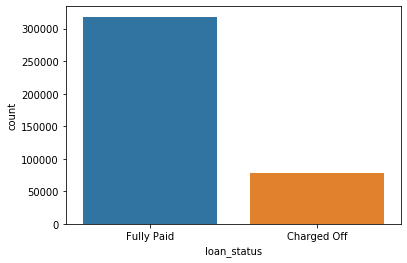

In [20]:
sns.countplot(x='loan_status', data=df)

**A histogram of the loan_amnt column.**

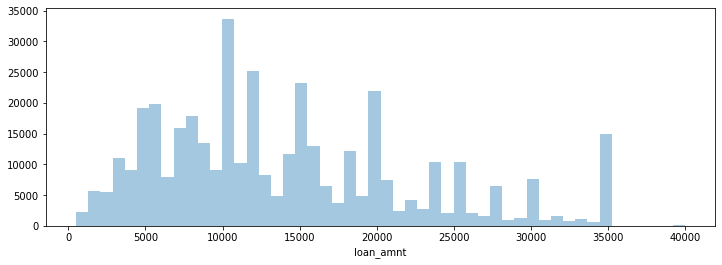

In [28]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'], kde=False)

**Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [30]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Visualizing this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

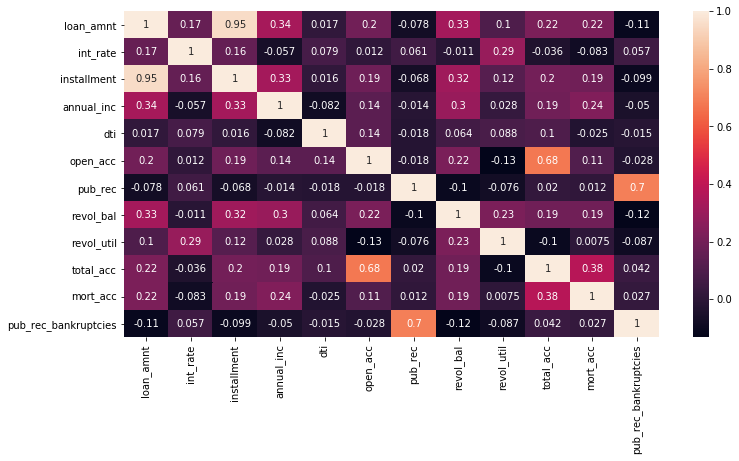

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

**You should have noticed almost perfect correlation with the "installment" feature. Explore this feature furthermore, I perform a scatterplot between them.**

In [23]:
feat_info('installment')
feat_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


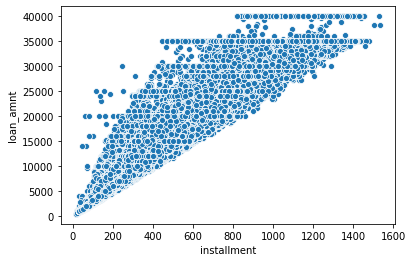

In [31]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

**A boxplot showing the relationship between the loan_status and the Loan Amount.**

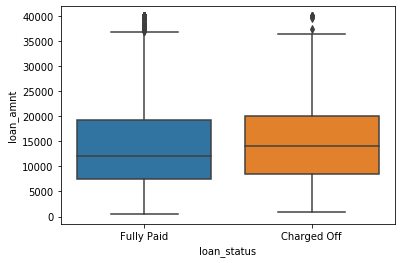

In [48]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

**Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [36]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans.**

In [40]:
list(df['grade'].unique())

['B', 'A', 'C', 'E', 'D', 'F', 'G']

In [41]:
list(df['sub_grade'].unique())

['B4',
 'B5',
 'B3',
 'A2',
 'C5',
 'C3',
 'A1',
 'B2',
 'C1',
 'A5',
 'E4',
 'A4',
 'A3',
 'D1',
 'C2',
 'B1',
 'D3',
 'D5',
 'D2',
 'E1',
 'E2',
 'E5',
 'F4',
 'E3',
 'D4',
 'G1',
 'F5',
 'G2',
 'C4',
 'F1',
 'F3',
 'G5',
 'G4',
 'F2',
 'G3']

**countplot per grade. Set the hue to the loan_status label.**

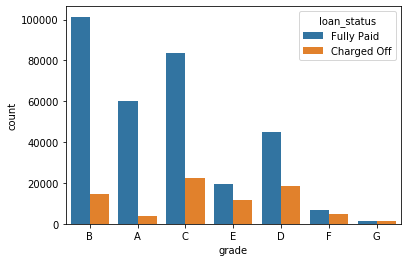

In [42]:
sns.countplot(x='grade', hue='loan_status', data=df)

**A count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Explore both all loans made per subgrade as well being separated based on the loan_status.**

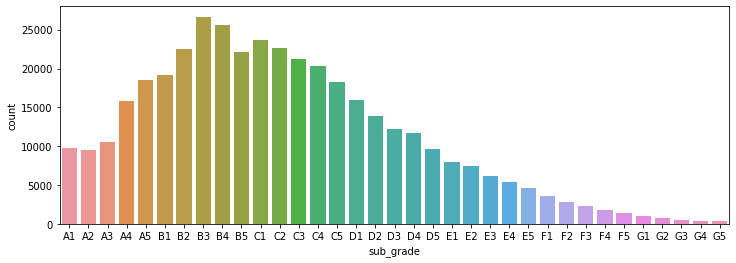

In [49]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(df['sub_grade'], order=subgrade_order)

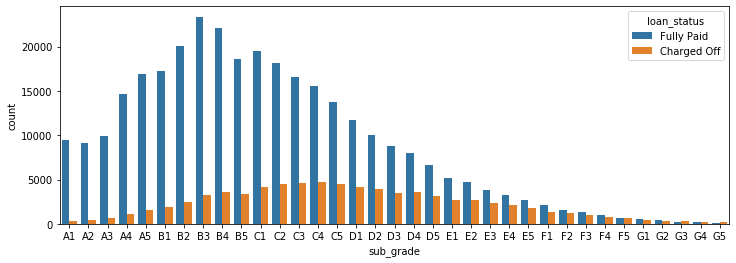

In [51]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data=df, hue='loan_status', order=subgrade_order)

**It looks like F and G subgrades don't get paid back that often. Better to isloate those and recreate the countplot just for those subgrades.**

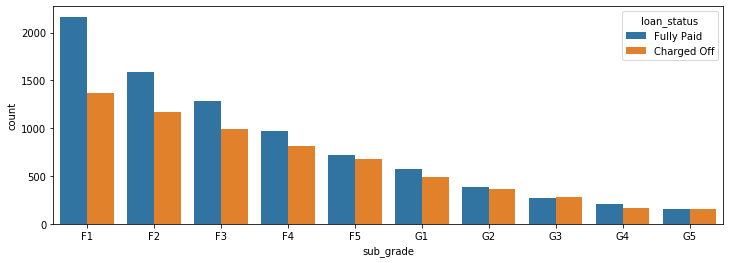

In [79]:
# CODE HERE
df_FG = df.loc[df["sub_grade"].str.startswith("F") | df["sub_grade"].str.startswith("G")]
df_FG['sub_grade'].unique()

plt.figure(figsize=(12,4))
subgrade_order = sorted(df_FG['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data=df_FG, hue='loan_status', order=subgrade_order)

**A new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [114]:
#df_status = pd.DataFrame(df['loan_status'])
df['loan_paid'] = df.loan_status.replace(to_replace=['Fully Paid', 'Charged Off'], value=[1, 0])
df[['loan_paid', 'loan_status']]

,loan_paid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**A bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

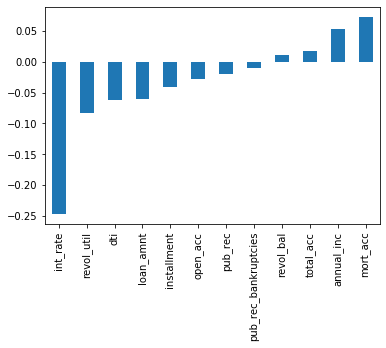

In [122]:
df.corr()['loan_paid'].sort_values().drop('loan_paid').plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [123]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_paid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [124]:
len(df)

396030

**Create a Series that displays the total count of missing values per column.**

In [136]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_paid                   0
dtype: int64

**Converting the Series above to be in term of percentage of the total DataFrame**

In [137]:
# CODE HERE
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_paid               0.000000
dtype: float64

**Let's examine emp_title and emp_length to see whether it will be okay to drop them.**

In [141]:
# CODE HERE
feat_info('emp_title')
print()
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**The number of unique employment job titles are there?**

In [145]:
df['emp_title'].nunique()

173105

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [154]:
df = df.drop('emp_title', axis=1)

**a count plot of the emp_length feature column and sorting the order**

In [165]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

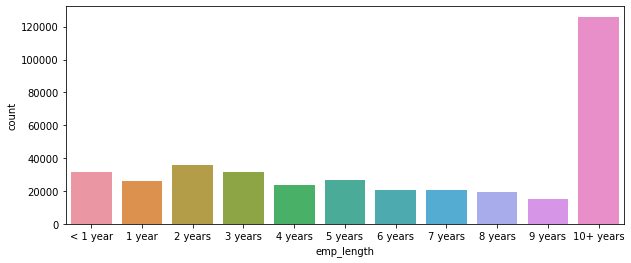

In [172]:
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length', data=df, order=emp_length)

**Plot out the countplot with a hue separating Fully Paid vs Charged Off**

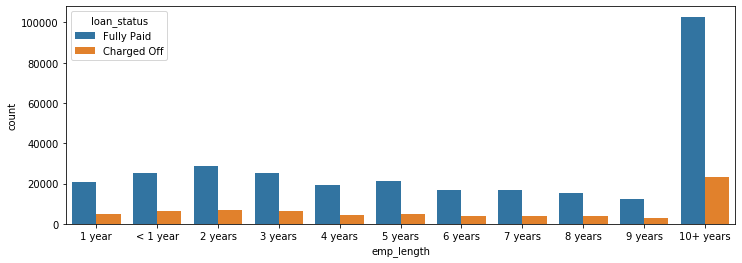

In [170]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, hue = 'loan_status', order=emp_length)

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once created, we can visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html).**

In [179]:
co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [177]:
fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [181]:
emplen_ratio = co/fp

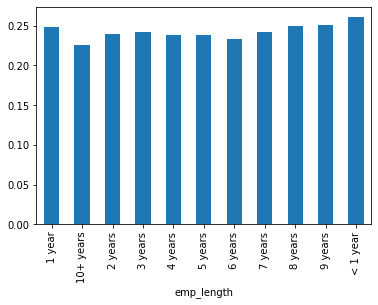

In [182]:
emplen_ratio.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths. Hence I drop the emp_length column.**

In [183]:
df = df.drop('emp_length', axis=1)

**Revisit the DataFrame to see what feature columns still have missing data.**

In [184]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_paid                   0
dtype: int64

**Let's check if the title column vs the purpose column.**

In [187]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column. So I drop the title column.**

In [188]:
df = df.drop('title', axis=1)

---
**This is one of the hardest parts of the project! I could fill or drop the missing values of the mort_acc though! Here we're going with a very specific approach.**


---
**Let's find out what the mort_acc feature represents**

In [189]:
feat_info('mort_acc')

Number of mortgage accounts.


**Creating a value_counts of the mort_acc column.**

In [198]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**There are many ways we could deal with this missing data. One way, we could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or one could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columns to see which most highly correlates to mort_acc**

In [199]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_paid               0.073111
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [230]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
tot_acc_avg[2]

0.0

***Relatively difficult one*: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. More information can be found in link below, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [232]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return tot_acc_avg[total_acc]
    else:
        return mort_acc

In [233]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x.total_acc,x.mort_acc), axis=1)

In [237]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_paid               0
dtype: int64

In [235]:
df = df.dropna()

In [236]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_paid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So we remove the rows that are missing those values in those columns with dropna().**

In [239]:
df_backup = df ## Just to save what we have worked so far

## Categorical Variables and Dummy Variables

**Once we address the missing data! Now we just need to deal with the string values due to the categorical columns.**

** Identifying all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [260]:
#df.dtypes[df.dtypes=='object']
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Time to go through all the string features to see what we should do with them.**

---


### term feature

**Converting the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [280]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [281]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [282]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

### grade feature

**Grade is part of sub_grade, so just drop the grade feature.**

In [284]:
df = df.drop('grade', axis=1)

**The subgrade variable is converted into dummy variables. Then it is concatenated to the original dataframe.  to The original subgrade column is dropped, drop_first=True.**

In [285]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [286]:
df = pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

In [292]:
#df[df['F4']==1]

### verification_status, application_type,initial_list_status,purpose 
**Converting the columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. I set drop_first=True and then drop the original columns.**

In [294]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)

df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1), dummies], axis=1)

In [296]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_paid', 'A2', 'A3',
       'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2',
       'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpos

### home_ownership
**Understanding the value_counts for the home_ownership column.**

In [297]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Converting these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then these are concatenated with the original dataframe.**

In [299]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [300]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [338]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

df = pd.concat([df.drop('home_ownership', axis=1), dummies], axis=1)

### address
**Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [302]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [303]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [304]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

**I make the zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [305]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)

df = pd.concat([df.drop('zip_code', axis=1), dummies], axis=1)

In [306]:
df = df.drop('address', axis=1)

In [307]:
df_backup = df

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [309]:
df = df.drop('issue_d', axis=1)

In [310]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'loan_status', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_paid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', '05113', '11650',

### earliest_cr_line
**This appears to be a historical time stamp feature. I use .apply function to extract the year from this feature, then convert it to a numeric feature. I set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [311]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [312]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Dec-1959       1
Jul-1962       1
Jun-1959       1
Nov-1955       1
Apr-1958       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [314]:
df = df.drop('earliest_cr_line', axis=1)

## Train Test Split

**Import train_test_split from sklearn.**

In [315]:
from sklearn.model_selection import train_test_split

**drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [321]:
df = df.drop('loan_status', axis=1)

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [371]:
df1 = df.sample(frac=0.4,random_state=101)
#print(len(df1))

**Setting X and y variables to the .values of the features and label.**

In [452]:
X = df1.drop('loan_paid', axis=1).values

y = df1['loan_paid'].values

In [438]:
print(X.shape)
print(y.shape)

(395219, 78)
(395219,)


In [450]:
y.value_counts()

1    126921
0     31167
Name: loan_paid, dtype: int64

**Here train/test split with test_size=0.2 and a random_state of 101.**

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [454]:
print(X_train.shape, X_test.shape)

(126470, 78) (31618, 78)


## Normalizing the Data

**In order to normalize the vlaues of the features X_train and X_test data, I use a MinMaxScaler. To avoid data leakage from the test set so we only fit on the X_train data and transform to X_test data set.**

In [329]:
from sklearn.preprocessing import MinMaxScaler

In [330]:
scaler = MinMaxScaler()

In [455]:
X_train = scaler.fit_transform(X_train)

In [456]:
X_test = scaler.transform(X_test)

In [443]:
print(X_test.shape, X_train.shape)

(79044, 78) (316175, 78)


# Creating the Model

**now import the necessary Keras functions.**

In [344]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**Build a sequential model which will be trained on the data. Though there are unlimited options here, a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: I have also added [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [459]:
# CODE HERE
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

**Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [460]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size = 250, validation_data = (X_test, y_test))

Train on 126470 samples, validate on 31618 samples
Epoch 1/25
126470/126470 [==============================] - 10s 75us/sample - loss: 0.3495 - val_loss: 0.2728
Epoch 2/25
126470/126470 [==============================] - 8s 61us/sample - loss: 0.2747 - val_loss: 0.2676
Epoch 3/25
126470/126470 [==============================] - 8s 60us/sample - loss: 0.2693 - val_loss: 0.2667
Epoch 4/25
126470/126470 [==============================] - 8s 61us/sample - loss: 0.2659 - val_loss: 0.2664
Epoch 5/25
126470/126470 [==============================] - 9s 68us/sample - loss: 0.2650 - val_loss: 0.2655
Epoch 6/25
126470/126470 [==============================] - 9s 71us/sample - loss: 0.2637 - val_loss: 0.2664
Epoch 7/25
126470/126470 [==============================] - 8s 64us/sample - loss: 0.2627 - val_loss: 0.2658
Epoch 8/25
126470/126470 [==============================] - 8s 63us/sample - loss: 0.2613 - val_loss: 0.2647
Epoch 9/25
126470/126470 [==============================] - 8s 64us/sample -

# Section 3: Evaluating Model Performance.

**First plot out the validation loss versus the training loss.**

In [462]:
losses = pd.DataFrame(model.history.history)

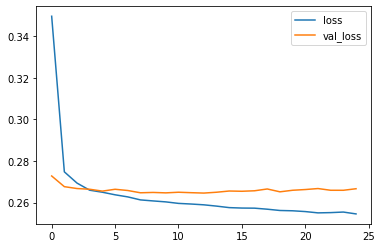

In [463]:
losses.plot()

**Predict the X_test set and display a classification report and confusion matrix for the X_test set.**

In [140]:
from sklearn.metrics import classification_report,confusion_matrix

In [464]:
predictions = model.predict_classes(X_test)

In [465]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.46      0.61      6279
           1       0.88      0.99      0.93     25339

    accuracy                           0.89     31618
   macro avg       0.91      0.72      0.77     31618
weighted avg       0.89      0.89      0.87     31618



In [466]:
print(confusion_matrix(y_test,predictions))

[[ 2873  3406]
 [  200 25139]]


**Test our model: Given the customer below, would you offer this person a loan?**

In [468]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_paid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
93700                   0.00
earliest_cr_year     1996.00
OTHER                   0.00
OWN                     0.00
RENT                    1.00
Name: 305323, Length: 78, dtype: float64

In [469]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [471]:
model.predict_classes(new_customer)

array([[1]], dtype=int32)

**checking, if this person actually end up paying back their loan?**

In [472]:
df.iloc[random_ind]['loan_paid']

1.0

# Done!